# TP SciPy

## Importer les librairies Numpy et SciPy

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Minimisation

*Minimiser la fonction $f(x) = (x-3)^2$*

In [2]:
from scipy.optimize import minimize

def f(x):
    return (x-3)**2

res = minimize(f, x0=2)
res.x
res.x[0]

2.999999992549203

*Minimize $𝑓(𝑥,𝑦)=(𝑥−1)^2+(𝑦−2.5)^2$*
avec $$x-2y+2 \geq 0 $$
$$-x-2y+6 \geq 0$$
$$-x + 2y + 2 \geq 0$$
$$x \geq 0 $$
$$y \geq 0 $$
* 2D function takes in vector $x$
* Constraints must be specified as $g_i(x) \geq 0$
* Bounds specified as rectangular 

In [3]:
f = lambda x: (x[0]-1)**2 +(x[1]-2.5)**2
cons = ({'type': 'ineq', 'fun': lambda x:  x[0] - 2 * x[1] + 2},
        {'type': 'ineq', 'fun': lambda x: -x[0] - 2 * x[1] + 6},
        {'type': 'ineq', 'fun': lambda x: -x[0] + 2 * x[1] + 2})
bnds = ((0, None), (0, None))
res = minimize(f, (2, 0), bounds=bnds, constraints=cons)

In [4]:
res.x

array([1.4, 1.7])

In [36]:
def f(x):
    return ((x[0]-1)**2 +(x[1]-2.5)**2)

res = minimize(f,(1,2))
res.x
    

array([0.99999999, 2.49999999])

# Interpolation

In [20]:
x = np.linspace(0, 10, 11)
y = x**2 * np.sin(x)
print(x)
print(y)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[  0.           0.84147098   3.63718971   1.27008007 -12.10883992
 -23.97310687 -10.05895794  32.19234334  63.31892778  33.3815973
 -54.40211109]


Text(0, 0.5, 'y')

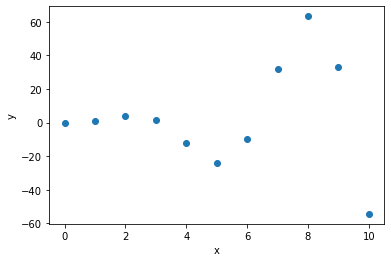

In [23]:
x = np.array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9., 10])
y =np.array([  0., 0.84147098, 3.63718971, 1.27008007, -12.10883992, -23.97310687, -10.05895794, 32.19234334, 63.31892778, 33.3815973, -54.40211109 ])
plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')

Supposons que nous avons les données suivantes:

x = [0., 1., 2., 3., 4., 5., 6., 7., 8., 9., 10.])

y = [ 0.,           0.84147098,   3.63718971,   1.27008007, -12.10883992,
 -23.97310687, -10.05895794,  32.19234334,  63.31892778,  33.3815973, -54.40211109]
<p align="center">
  <img src="interp1D.png" alt="drawing" width="300" align="center"/>
</p>

*1- Interpoler les valeurs intermediaires.*

*2- Visualiser les points interpolés*

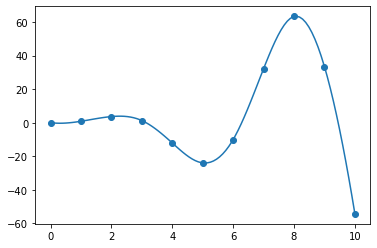

In [26]:
from scipy.interpolate import interp1d
f = interp1d(x, y, kind='cubic') #linear
x_dense = np.linspace(0, 10, 100)
y_dense = f(x_dense)
plt.plot(x_dense, y_dense)
plt.scatter(x, y)

In [27]:
interp1d?

## Cruve Fitting, Derivee, Integral

*L'équation du mouvement du ressort est $𝑦(𝑡)=𝐴\cos(\omega𝑡+\phi)$. On collecte les données présentées dans la cellule suivante.*

*1- Trouver l'amplitude $A$, la fréquence d'oscillation $\omega$, et la phase $\phi$ pour le mouvement du ressort.
Considerer les approximations initiales suivantes:* 

* $\omega  = \pi$
* $A=4$
* $\phi = 0$

*2- Visualiser la fonction $y(t)$*

*3- Trouver l'erreur sur les 3 param$\grave{e}$tres*

*4- Trouver la deriv$\acute{e}$e d'ordre 2 de la fonction $y(t)$*

*5- Visualiser la fonction $y(t)$ et sa deriv$\acute e$e*

*6- Trouver  $\int_0^{4} y(t) dt $ *

In [42]:
t_data = np.array([ 0.   ,  0.34482759,  0.68965517,  1.03448276,  1.37931034,
        1.72413793,  2.06896552,  2.4137931 ,  2.75862069,  3.10344828,
        3.44827586,  3.79310345,  4.13793103,  4.48275862,  4.82758621,
        5.17241379,  5.51724138,  5.86206897,  6.20689655,  6.55172414,
        6.89655172,  7.24137931,  7.5862069 ,  7.93103448,  8.27586207,
        8.62068966,  8.96551724,  9.31034483,  9.65517241, 10.        ])
y_data = np.array([ 4.3303953 ,  1.61137995, -2.15418696, -3.90137249, -1.67259042,
        2.16884383,  3.86635998,  1.85194506, -1.8489224 , -3.96560495,
       -2.13385255,  1.59425817,  4.06145238,  1.89300594, -1.76870297,
       -4.26791226, -2.46874133,  1.37019912,  4.24945607,  2.27038039,
       -1.50299303, -3.46774049, -2.50845488,  1.20022052,  3.81633703,
        2.91511556, -1.24569189, -3.72716214, -2.54549857,  0.87262548])

In [43]:
#1 Trouver l'amplitude 𝐴, la fréquence d'oscillation 𝜔, et la phase 𝜙 pour le mouvement du ressort
from scipy.optimize import curve_fit

def f(t,a,w,phi):
    return a*np.cos(w*t+phi)

popt, pcov = curve_fit(f,t_data, y_data,p0=([1,np.pi,3]))

In [63]:
a,w,phi = popt
popt

array([-3.94836219,  2.99899521,  3.24570622])

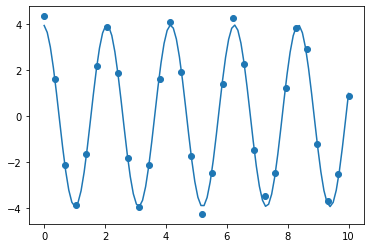

In [52]:
#2 Visualiser la fonction 𝑦(𝑡)
t=np.linspace(0,10,100)
y = f(t, a,w,phi)
plt.plot(t,y)
plt.scatter(t_data,y_data)

In [53]:
#3 - calcul de l'erreur sur les 3 parametres
np.sqrt(np.diag(pcov))

array([0.05117447, 0.00430857, 0.02575703])

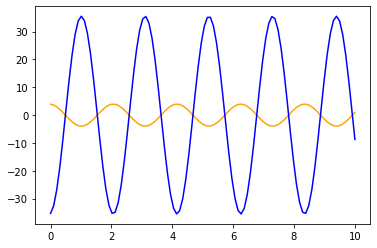

In [70]:
#4 - derivee
from scipy.misc import derivative
def f(t):
    return a*np.cos(w*t+phi)
y_prime = derivative(f, t,dx=1e-6, n= 2 )
plt.plot(t,y,'orange')
plt.plot(t,y_prime,'blue')

In [75]:
#5- primitive
from scipy.integrate import quad
integrand = lambda x: x**2 * np.sin(2*x) * np.exp(-x)
integral, integral_error = quad(f, 0, 4)
integral

-0.7287020586659947

In [10]:
curve_fit?

## Equation Diff

*La loi de refroidissement de Newton, énoncée par Isaac Newton stipule que le taux de perte de chaleur d'un corps est proportionnel à la différence de température entre le corps et le milieu environnant tel que:*

$$\frac{dT}{dt} = -0.5(T-T_s(t)) $$

*o$\grave{u}$ $T $ est la température du corps et  $T_s(t)) $ est la température du milieu environnant*

*1- Ineterpoler la fonction $T_s(t)$ étant donné que vous avez collecté des mesures de la temperature l'extérieur comme suit.*

*2- Resoudre l'equation differentielle pour trouver la temperature $T(t)$ tel que $T(0) = 284.6945461$*
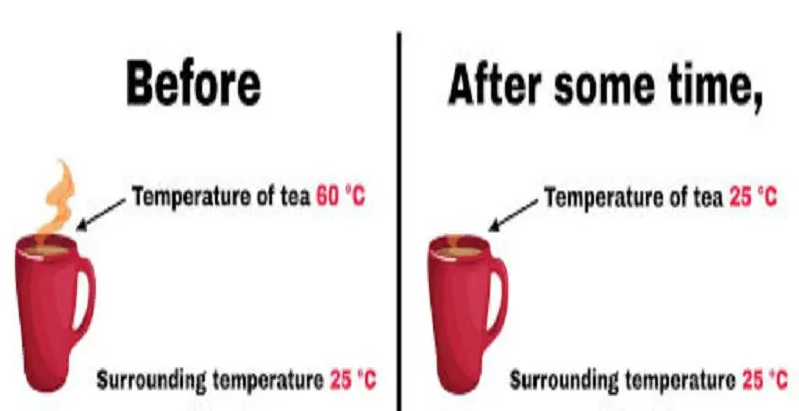

In [81]:
#temps mesuré
t_m = np.array([ 0.,  1.04347826,  2.08695652,  3.13043478,  4.17391304,
        5.2173913 ,  6.26086957,  7.30434783,  8.34782609,  9.39130435,
       10.43478261, 11.47826087, 12.52173913, 13.56521739, 14.60869565,
       15.65217391, 16.69565217, 17.73913043, 18.7826087 , 19.82608696,
       20.86956522, 21.91304348, 22.95652174, 24.        ])

#température exterieure mesurée
temp_ext_m = np.array([283.2322975, 284.6945461, 286.2259041, 287.8603625, 289.6440635,
       291.6187583, 293.7939994, 296.1148895, 298.4395788, 300.5430675,
       302.1566609, 303.0363609, 303.0363609, 302.1566609, 300.5430675,
       298.4395788, 296.1148895, 293.7939994, 291.6187583, 289.6440635,
       287.8603625, 286.2259041, 284.6945461, 283.2322975])

In [86]:
# 1 Interpolation Ts(t)

from scipy.interpolate import interp1d
Ts = interp1d(t_m, temp_ext_m, kind = 'cubic')

#Ts(t)

In [83]:
#2 y'=-0.5(y-Ts)
from scipy.integrate import odeint

def dydt(T, t):
    return -0.5(T-Ts(t))
t = np.linspace(1, 24, 100)
T0 = 
sol = odeint(dydt, T0, t)
y_sol = sol.T[0]


<div class="alert alert-block alert-info">
<b>Tip:</b> Use blue boxes (alert-info) for tips and notes. 
If it’s a note, you don’t have to include the word “Note”.
</div>

<div class="alert alert-block alert-warning">
<b>Example:</b> Use yellow boxes for examples that are not 
inside code cells, or use for mathematical formulas if needed.
</div>

<div class="alert alert-block alert-success">
<b>Up to you:</b> Use green boxes sparingly, and only for some specific 
purpose that the other boxes can't cover. For example, if you have a lot 
of related content to link to, maybe you decide to use green boxes for 
related links from each section of a notebook.
</div>

<div class="alert alert-block alert-danger">
<b>Just don't:</b> In general, avoid the red boxes. These should only be
used for actions that might cause data loss or another major issue.
</div>

[Minimize](#TP-SciPy---Solution)